In [1]:
import uproot
import pandas as pd 
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
protoni_path = "protoni_10000.root"
fotoni_path = "fotoni_10000_indice2.root"
with uproot.open(protoni_path) as file:
    print(file.keys())

['Header;1', 'Shower;1']


In [3]:
with uproot.open(protoni_path) as file:
    shower_p = file["Shower"]
    df_p = shower_p.arrays(library="pd") 
    Mu_ground_p = np.array([x[-1] for x in df_p["Mu"]]) #array del valore a terra dei Mu per ogni evento
    print(Mu_ground_p)
    df_p["Mu_ground"] = Mu_ground_p
    print(shower_p.keys())

[ 6391033.5  7861877.   5696079.5 ...  6916859.   4319329.  10266868. ]
['lgE', 'zenith', 'azimuth', 'Seed2', 'Seed3', 'Xfirst', 'Hfirst', 'XfirstIn', 'altitude', 'X0', 'Xmax', 'Nmax', 'p1', 'p2', 'p3', 'chi2', 'Xmx', 'Nmx', 'XmxdEdX', 'dEdXmx', 'cpuTime', 'nX', 'X', 'N', 'H', 'D', 'dEdX', 'Mu', 'Gamma', 'Electrons', 'Hadrons', 'dMu', 'EGround']


In [4]:
print(df_p.head())

         lgE     zenith     azimuth   Seed2  Seed3      Xfirst        Hfirst  \
0  18.054790  14.277386   26.915691       3      0    0.842654  50143.687500   
1  18.372387  58.412361  119.279938  169046      0  192.690445  16266.759766   
2  18.128132  39.524895  121.361275    8514      0   43.871632  23332.671875   
3  18.458578  63.694782  277.772980  194324      0   17.722858  32879.250000   
4  18.625795  28.968327  183.309158  640556      0  127.224701  15690.264648   

   XfirstIn  altitude         X0  ...  \
0  0.847651       0.0  -0.009987  ...   
1  0.788660       0.0  81.416092  ...   
2  0.501517       0.0  -0.000122  ...   
3  0.673540       0.0  -5.224577  ...   
4  0.793284       0.0  65.973907  ...   

                                                   H  \
0  [100000.0, 31603.900390625, 26983.51171875, 24...   
1  [100000.0, 35774.2890625, 30978.279296875, 282...   
2  [100000.0, 33140.9453125, 28467.353515625, 258...   
3  [100000.0, 36918.390625, 32054.017578125, 293

In [5]:
(df_p['Xmax'] > 2000).any()

np.True_

In [6]:
with uproot.open(fotoni_path) as file:
    print(file.keys())

['Header;1', 'Shower;1']


In [7]:
with uproot.open(fotoni_path) as file:
    shower_f = file["Shower"]
    df_f = shower_f.arrays(library="pd")
    Mu_ground_f = np.array([x[-1] for x in df_f["Mu"]]) #array del valore a terra dei Mu per ogni
    df_f["Mu_ground"] = Mu_ground_f
    print(Mu_ground_f)
    
    print(shower_f.keys())
    

[ 678056.4 1099551.  2977366.5 ... 2613547.5 4612663.5 1150389.4]
['lgE', 'zenith', 'azimuth', 'Seed2', 'Seed3', 'Xfirst', 'Hfirst', 'XfirstIn', 'altitude', 'X0', 'Xmax', 'Nmax', 'p1', 'p2', 'p3', 'chi2', 'Xmx', 'Nmx', 'XmxdEdX', 'dEdXmx', 'cpuTime', 'nX', 'X', 'N', 'H', 'D', 'dEdX', 'Mu', 'Gamma', 'Electrons', 'Hadrons', 'dMu', 'EGround']


In [8]:
print(df_f.head())

         lgE     zenith     azimuth   Seed2  Seed3     Xfirst        Hfirst  \
0  18.202272  44.798191  222.485291       3      0  14.304082  31255.046875   
1  18.269442  23.852491  288.964569  180654      0   8.164075  33387.175781   
2  18.697544  29.953617  200.438599  621790      0  76.174179  19037.662109   
3  19.914516  54.300850  119.894577   28502      0  34.070583  26755.783203   
4  18.368172  21.709972  133.565109      12      0  12.586493  30333.105469   

   XfirstIn  altitude          X0  ...  \
0       1.0       0.0 -180.752380  ...   
1       1.0       0.0 -198.612976  ...   
2       1.0       0.0  -92.377899  ...   
3       1.0       0.0 -197.475769  ...   
4       1.0       0.0 -248.011398  ...   

                                                   H  \
0  [100000.0, 33706.08984375, 29009.8359375, 2633...   
1  [100000.0, 31992.630859375, 27359.888671875, 2...   
2  [100000.0, 32356.52734375, 27711.55078125, 250...   
3  [100000.0, 35036.7578125, 30279.587890625, 27

In [9]:
(df_f['Xmax'] > 2000).any()

np.True_

In [10]:
df_p['label'] = 0
df_f['label'] = 1

In [11]:
df_merged = pd.concat([df_p, df_f], ignore_index=True)

In [12]:
print(df_merged.head())

         lgE     zenith     azimuth   Seed2  Seed3      Xfirst        Hfirst  \
0  18.054790  14.277386   26.915691       3      0    0.842654  50143.687500   
1  18.372387  58.412361  119.279938  169046      0  192.690445  16266.759766   
2  18.128132  39.524895  121.361275    8514      0   43.871632  23332.671875   
3  18.458578  63.694782  277.772980  194324      0   17.722858  32879.250000   
4  18.625795  28.968327  183.309158  640556      0  127.224701  15690.264648   

   XfirstIn  altitude         X0  ...  \
0  0.847651       0.0  -0.009987  ...   
1  0.788660       0.0  81.416092  ...   
2  0.501517       0.0  -0.000122  ...   
3  0.673540       0.0  -5.224577  ...   
4  0.793284       0.0  65.973907  ...   

                                                   D  \
0  [101672.7734375, 31142.177734375, 26375.873046...   
1  [184556.46875, 65129.70703125, 56091.74609375,...   
2  [127147.609375, 41056.23046875, 35016.0390625,...   
3  [215920.078125, 79218.46875, 68465.921875, 62

In [13]:
print(df_merged.tail())

             lgE     zenith     azimuth   Seed2  Seed3      Xfirst  \
19995  18.445856  49.784992  145.550980  192823      0    2.789230   
19996  18.373631  26.114084  213.841583   62174      0  115.011086   
19997  18.527517   5.081564  206.493515  186774      0   14.215553   
19998  18.142523  60.738541  327.847107    2682      0  108.722191   
19999  18.335855  31.349958    2.063499    1333      0   23.798532   

             Hfirst  XfirstIn  altitude          X0  ...  \
19995  43959.089844       1.0       0.0   -0.007354  ...   
19996  16170.998047       1.0       0.0  -10.086597  ...   
19997  29060.439453       1.0       0.0 -198.293259  ...   
19998  20357.773438       1.0       0.0   49.520939  ...   
19999  26662.392578       1.0       0.0 -199.646500  ...   

                                                       D  \
19995  [151089.96875, 50817.83203125, 43549.16796875,...   
19996  [109588.0390625, 34167.46875, 29008.98046875, ...   
19997  [98964.03125, 30118.837890625, 

In [14]:

df_filtered = df_merged[df_merged['Xmax'] <= 2000]

In [15]:
(df_filtered['Xmax'] > 2000).any()

np.False_

In [16]:
var = ((len(df_merged) - len(df_filtered))/ len(df_merged)) *100
print(var,"%")

0.125 %


In [20]:
train_data, test_data = train_test_split(df_merged, test_size=0.2, random_state=42)
features = ["zenith", "Xmax","Mu_ground","lgE"]
y = train_data["label"]
y_test = test_data["label"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
model = RandomForestClassifier(n_estimators=200,max_depth=20,random_state=1)
model.fit(X,y)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9912


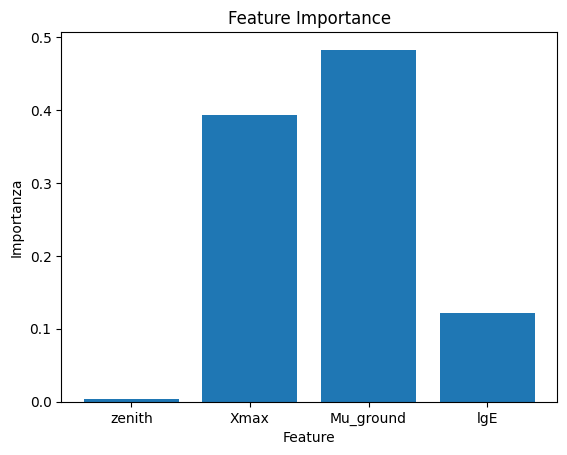

In [18]:
importances = model.feature_importances_
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importanza')
plt.title('Feature Importance')
plt.show()